In [ ]:
import time, sys
print(time.ctime())
print(sys.version.split('|')[0])

Sat Dec 18 19:16:40 2021
3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


In [5]:
#!pip install emoji==0.6.0
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
os.chdir('/content/drive/MyDrive/Josue/Programas personales phyton/Curso Udemy Data Analytics Real-World Projects in Python/1-Youtube Text Data Analysis')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
#os.getcwd()
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re
import emoji

Made by: JOSUE DAVID CASTILLO ARAIZA

IN THIS PROGRAM I PERFORM AN ANALYSIS OF VIDEOS FROM US YOUTUBERS, WHERE I 
MAKE SOME ANALYSIS OF COMMENTS, TAGS, AND LIKES/DISLIKES, MAKING USE OF 
SENTIMENTS FROM EACH COMMENT AN EMOTIONS BY EMOJIS TO ASSIG POLARATY [-1 TO 1].



In [12]:
comments=pd.read_csv('GBcomments.csv', error_bad_lines = False ) #Importing and ignoring corrupted lines of code

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [13]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [14]:
TextBlob("It's more accurate to call it the M+ (1000) be...	").sentiment.polarity

0.45000000000000007

In [15]:
comments.isna().sum() #check the total sum of isna() in each header

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [16]:
comments.dropna(inplace=True)
polarity = []

for i in comments["comment_text"]:
	polarity.append(TextBlob(i).sentiment.polarity)

#I ADD polarity column for each comment text in the videos

In [17]:
comments["polarity"]=polarity
comments.head(20)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [18]:
comments_positive = comments[comments["polarity"]==1]
print(comments_positive.shape)
comments_positive.head()
#Possitive comments are weighted for "1" value

(20400, 5)


,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [19]:
stopwords = set(STOPWORDS)
total_comments = ' '.join(comments_positive["comment_text"])

***Wordclouds: Positive, Negative and Neutral***

In [20]:
wordcloud = WordCloud(width=1000, height = 500, stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

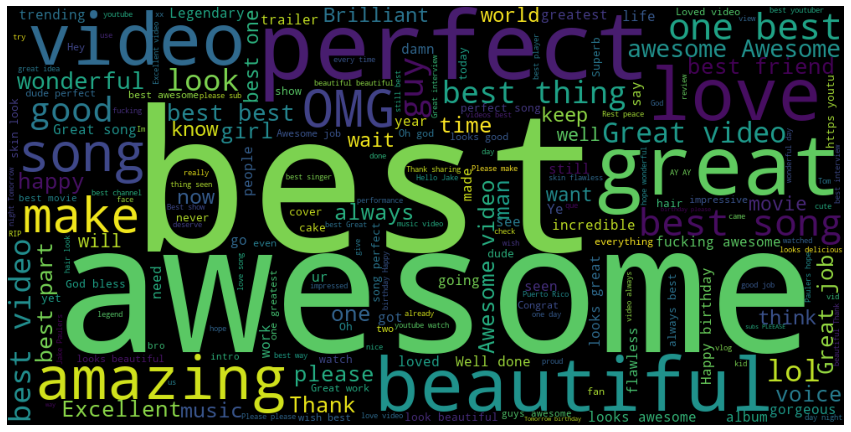

In [21]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
#Wordcloud for positive comments

In [ ]:
comments_negative = comments[comments["polarity"]==-1]
total_comments = ' '.join(comments_negative["comment_text"])
wordcloud = WordCloud(width=1000, height = 500, stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

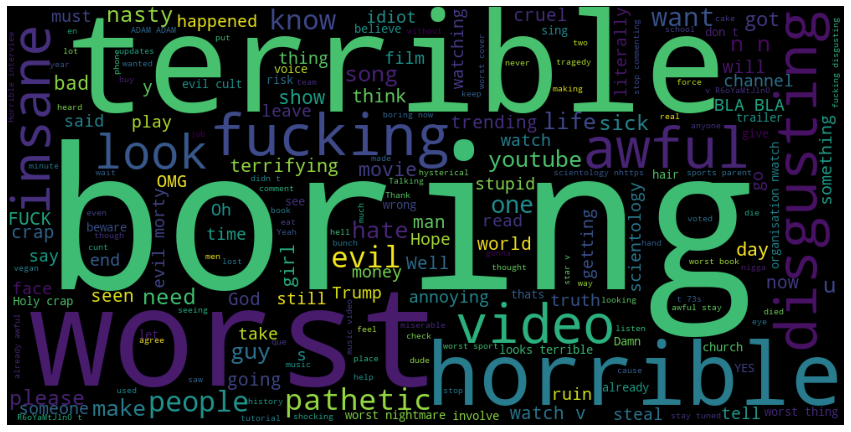

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
#Wordcloud for negative comments

In [ ]:
comments_neutral = comments[comments["polarity"]==0]
total_comments = ' '.join(comments_neutral["comment_text"])
wordcloud = WordCloud(width=1000, height = 500, stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

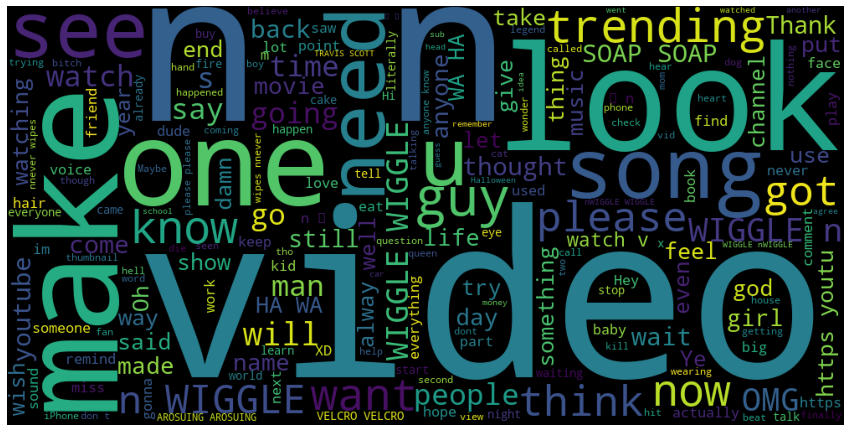

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
#Wordcloud for neutral comments

In [23]:
videos = pd.read_csv('USvideos.csv', error_bad_lines = False ) #Importing and ignoring corrupted lines of code

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [24]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [25]:
videos["tags"]

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [26]:
tags_complete = " ".join(videos["tags"])

In [27]:
tags = re.sub('[^a-zA-Z]', " ", tags_complete) #Dont Remove a to z lowcase and A to Z uppercase 

In [28]:
tags = re.sub(' +', ' ', tags) #Substitute more than 1 space for just 1 space

In [29]:
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

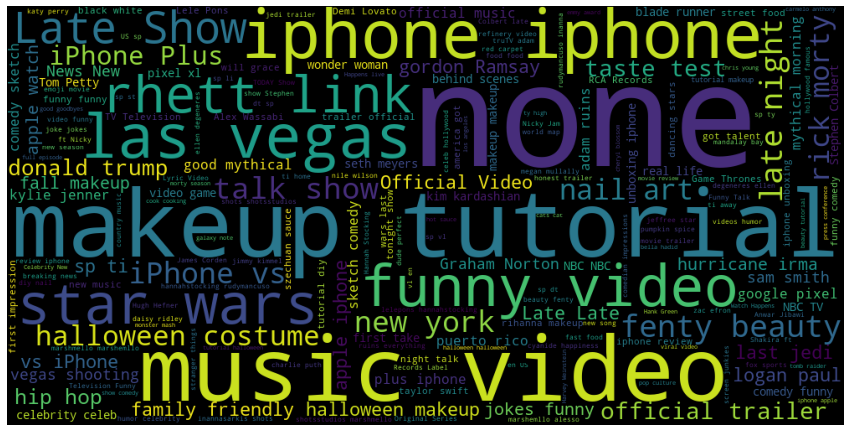

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
#wordcloud for tags

Text(0.5, 1.0, 'Regression plot for views & likes')

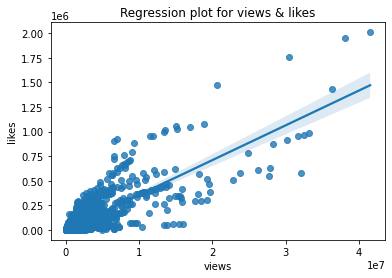

In [31]:
sns.regplot(data=videos, x="views", y="likes")
plt.title("Regression plot for views & likes")

Text(0.5, 1.0, 'Regression plot for views & dislikes')

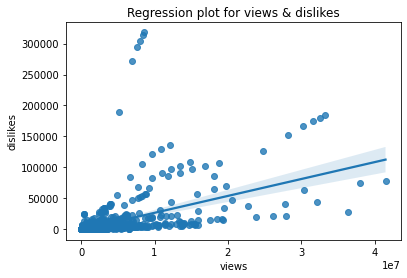

In [32]:
sns.regplot(data=videos, x="views", y="dislikes")
plt.title("Regression plot for views & dislikes")

In [33]:
df_corr = videos[["views", "likes", "dislikes"]]
matrix_corr = df_corr.corr() #correlation matrix of dislikes-likes-views

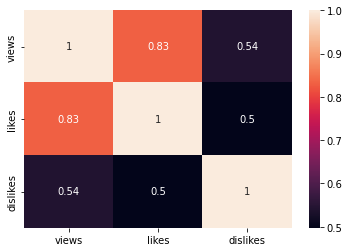

In [34]:
sns.heatmap(df_corr.corr(), annot= True)
#Correlation matrix in a heatmap to visualize the relationship bewtween variables

###From here and on, I make analysis of emojis

In [35]:
comments.dropna()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00
...,...,...,...,...,...
718447,lLN1FwiqGwc,MEME ME MEME ME MEME ME,0,0,0.00
718448,lLN1FwiqGwc,"Yeah, but does everybody float?",0,0,0.00
718449,lLN1FwiqGwc,That meme me dace 😂,0,0,0.00
718450,lLN1FwiqGwc,10:43 Is that Miles Upshur????,2,0,0.00


In [36]:
len(comments)

718424

In [38]:
#comments["comment_text"][1]
comment = comments["comment_text"][1]

In [39]:
[f for f in comment if f in emoji.UNICODE_EMOJI] #Confirming if identify emojis from text

['😂', '😂', '😂']

In [ ]:
#comments['comment_text'].dropna() #just in case there are NA values in rows

0         It's more accurate to call it the M+ (1000) be...
1                     To be there with a samsung phone\n😂😂😂
2         Thank gosh, a place I can watch it without hav...
3         What happened to the home button on the iPhone...
4         Power is the disease.  Care is the cure.  Keep...
                                ...                        
718447                              MEME ME MEME ME MEME ME
718448                      Yeah, but does everybody float?
718449                                  That meme me dace 😂
718450                       10:43 Is that Miles Upshur????
718451                                  WA-HA\nWA-HA\nWA-HA
Name: comment_text, Length: 718424, dtype: object

In [40]:
str = "" #I make a empty string to save emojis in the next loop, searching in comment_text
for i in comments["comment_text"]:
	list = [c for c in i if c in emoji.UNICODE_EMOJI]
	for l in list:	
		str = str+l

In [43]:
len(str)

341868

In [45]:
result = {} #Empety dictionary to save the count of every emoji
for i in set(str):
	result[i] = str.count(i)

In [59]:
#result

In [52]:
final = {}
for key,value in sorted(result.items(),key= lambda item:item[1]):
	final[key] = value
#save in a dictionary the emoji and times is in the result dictionary

In [57]:
#final

In [62]:
keys = [*final.keys()] #Unzip my keys (keys are the emojis)
values = [*final.values()] #Unzip my values (values are the number of times a emoji is repeated)

In [66]:
df = pd.DataFrame({'chars':keys[-20:], 'num':values[-20:]}) #the 20 most trending emojis

In [68]:
import plotly.graph_objs as go
from plotly.offline import iplot
trace = go.Bar(x=df['chars'],y=df['num'])
iplot([trace]) #It's important to be iplot and not plot, because plot well open a html with images
#and iplot shows you in the ipynb
#This shows you the graph of trending emojis